In [1]:
from brainflux.dataloaders import NumpyLoader
from brainflux.filters import RangeFilterTFIDF, RangeFilter
from brainflux.dataclasses import suppression_ratio

data_loader = NumpyLoader(
    label_file="/workspaces/BrainFlux/test_data/train.csv", dev_mode=False
)

data_filters = [
    RangeFilter(
        data_source=suppression_ratio,
        num_ranges=4,
        num_time_divisions=4,
    ), 
    RangeFilterTFIDF(
        data_source=suppression_ratio,
        num_ranges=4,
        num_time_divisions=4,
        min_filter_score_cutoff=0.3,
        true_label=0,
    )
]

In [2]:
from brainflux.evaluators.evaluator_base import EvaluatorBase
from brainflux.evaluators.general import (
    ClassifierStatsEvaluator, FDPPlotsEvaluator, FilterScoreDistributionsEvaluator, TroubleMakerImpactEvaluator
)

evaluators: list[EvaluatorBase] = [
    # TroubleMakerImpactEvaluator(
    #     block=False,
    #     save=True,
    #     show=False,
    #     true_labels=0,
    #     plot_title=f"Trouble Maker Impact Evaluation",
    # ),
    
    ClassifierStatsEvaluator(
        block=False,
        save=True,
        show=False,
        true_labels=0,
        plot_title=f"Classifier Metrics Evaluation",
    ),

    FDPPlotsEvaluator(
        block=False,
        save=True,
        show=False,
        plot_title=f"FDP Plots Evaluation",
    ),

    FilterScoreDistributionsEvaluator(
        block=False,
        save=True,
        show=False,
        plot_title=f"Filter Score Distributions Evaluation",
    )
]

Using cached data from: /workspaces/BrainFlux/.cache/files/suppression_ratio_RangeFilter_4x4_train.pkl
No post-processing applied to aggregated results.
Evaluating filter: RangeFilter_4x4. Aggregated data shape: (577, 4, 4)
Using cached data from: /workspaces/BrainFlux/.cache/files/suppression_ratio_RangeFilterTFIDF_4x4@0.3_train.pkl
Evaluating filter: RangeFilterTFIDF_4x4@0.3. Aggregated data shape: (577, 4, 4)


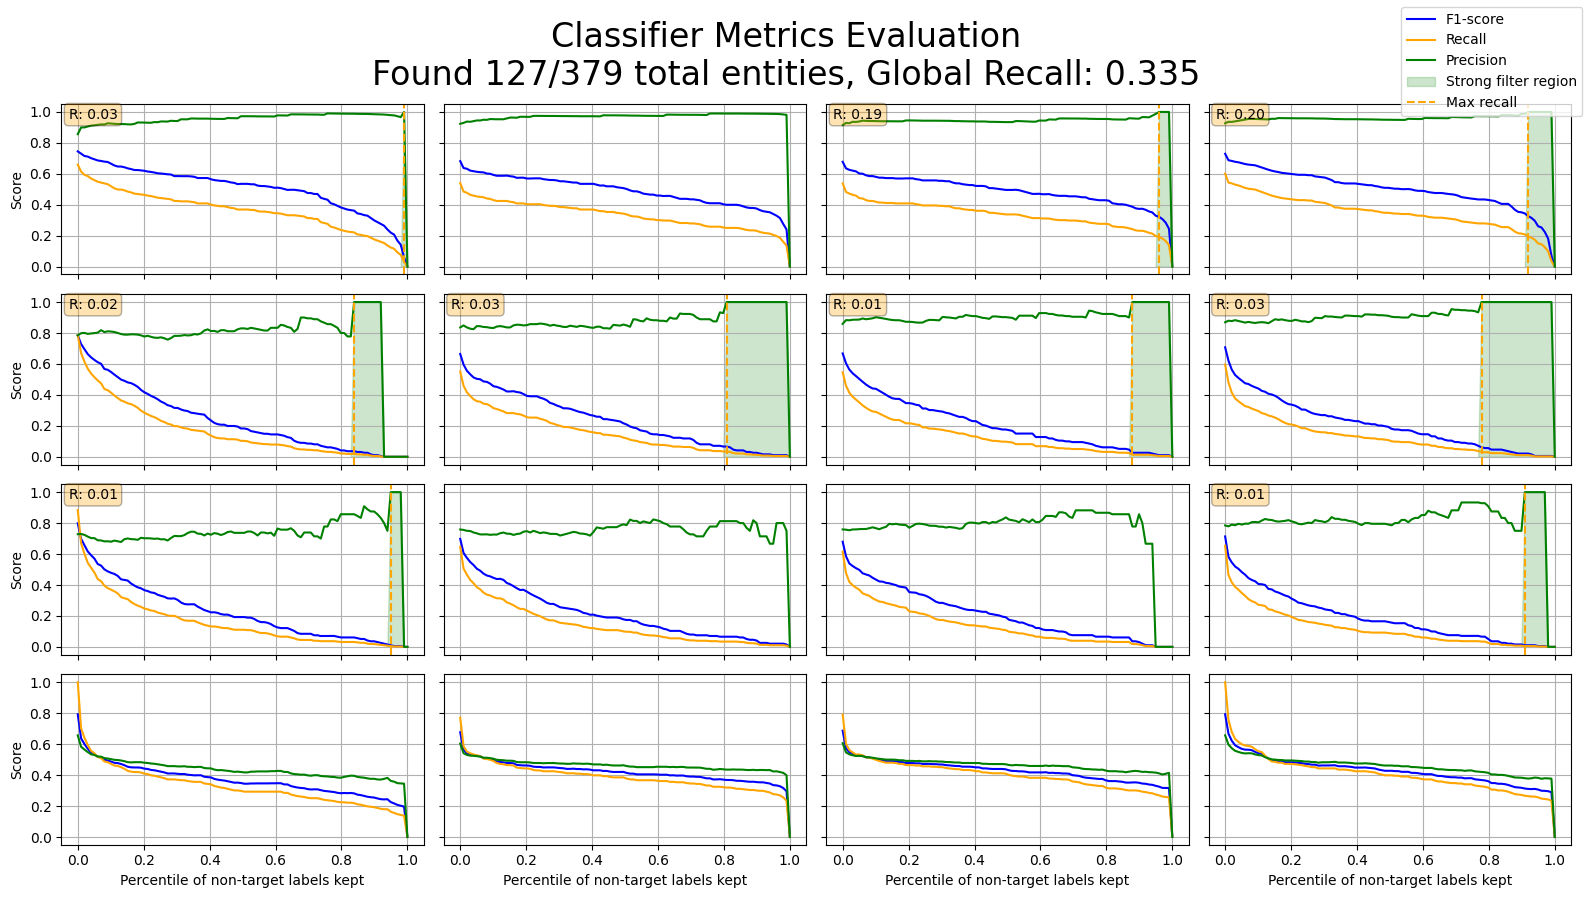

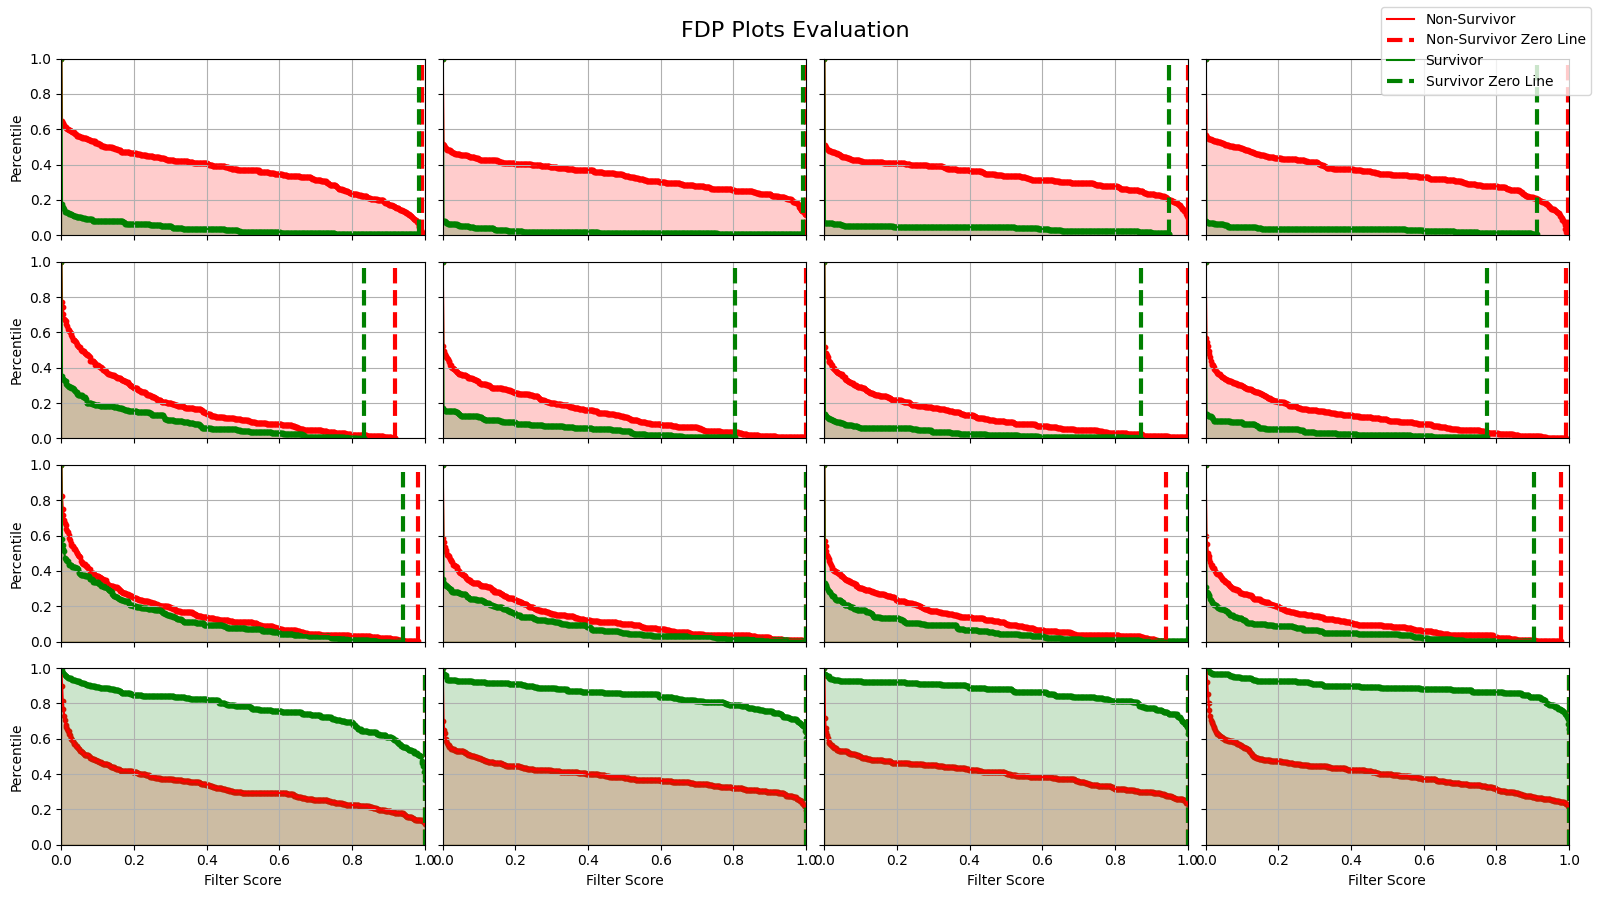

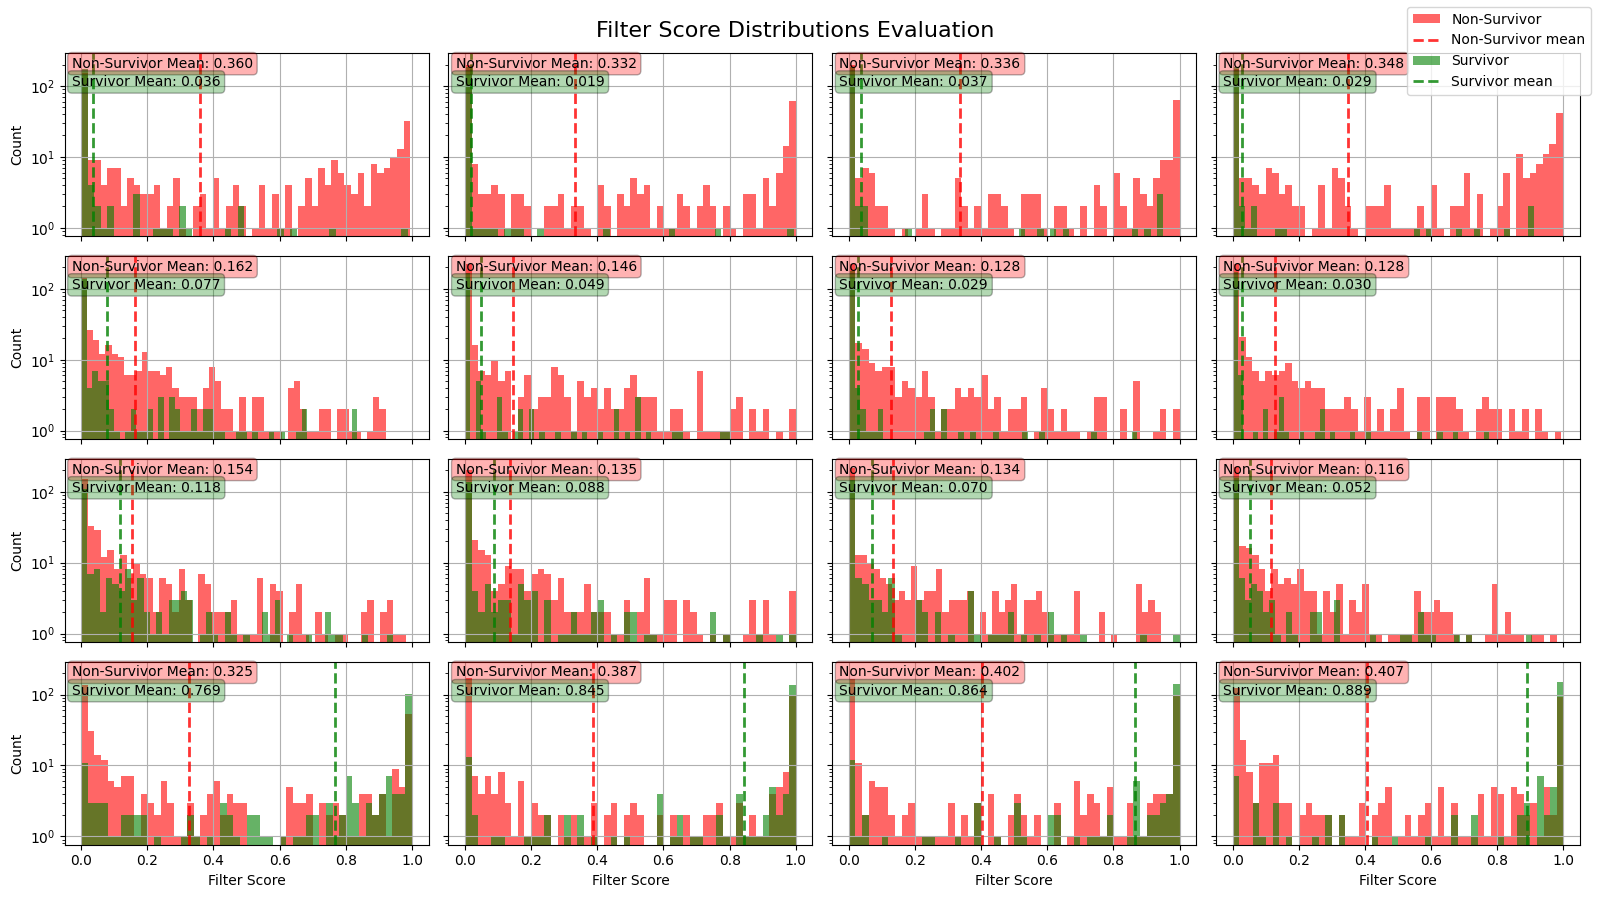

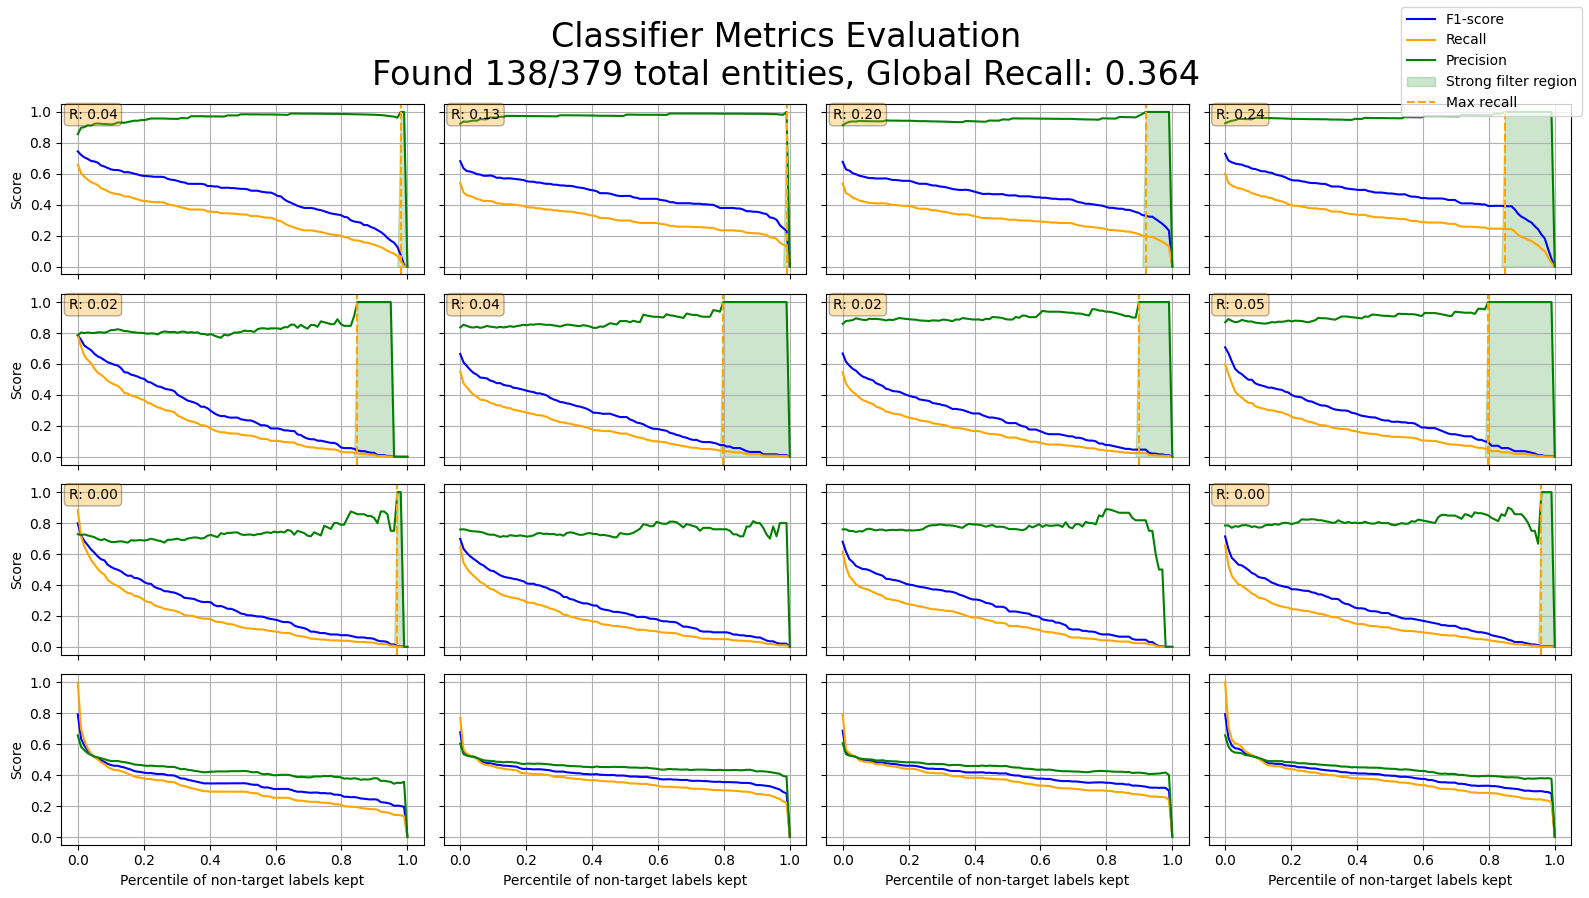

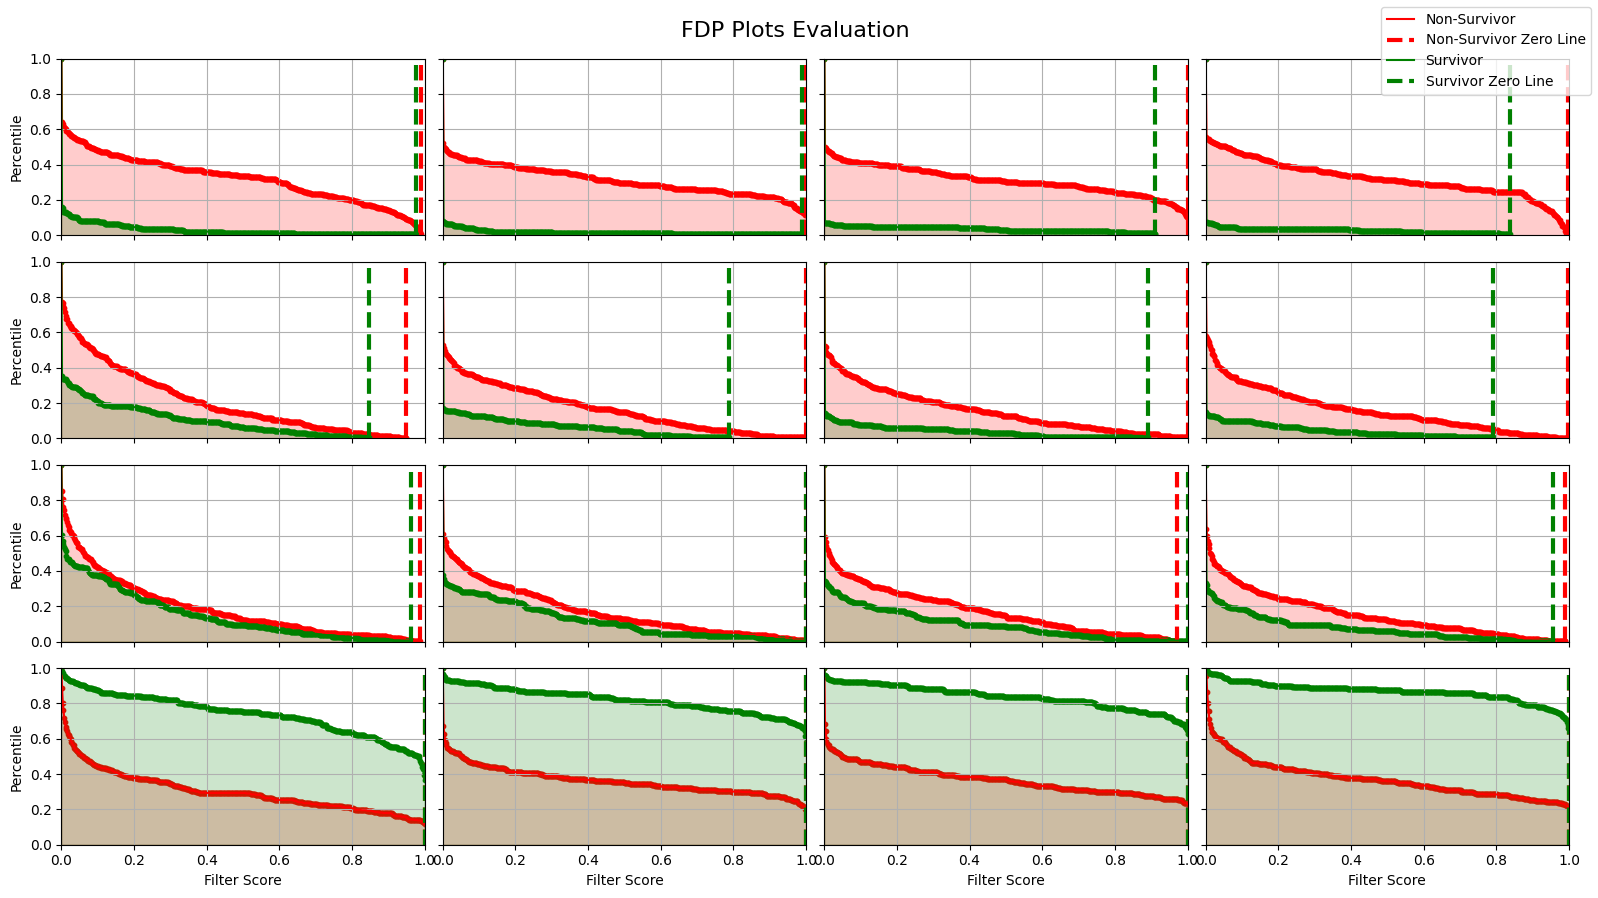

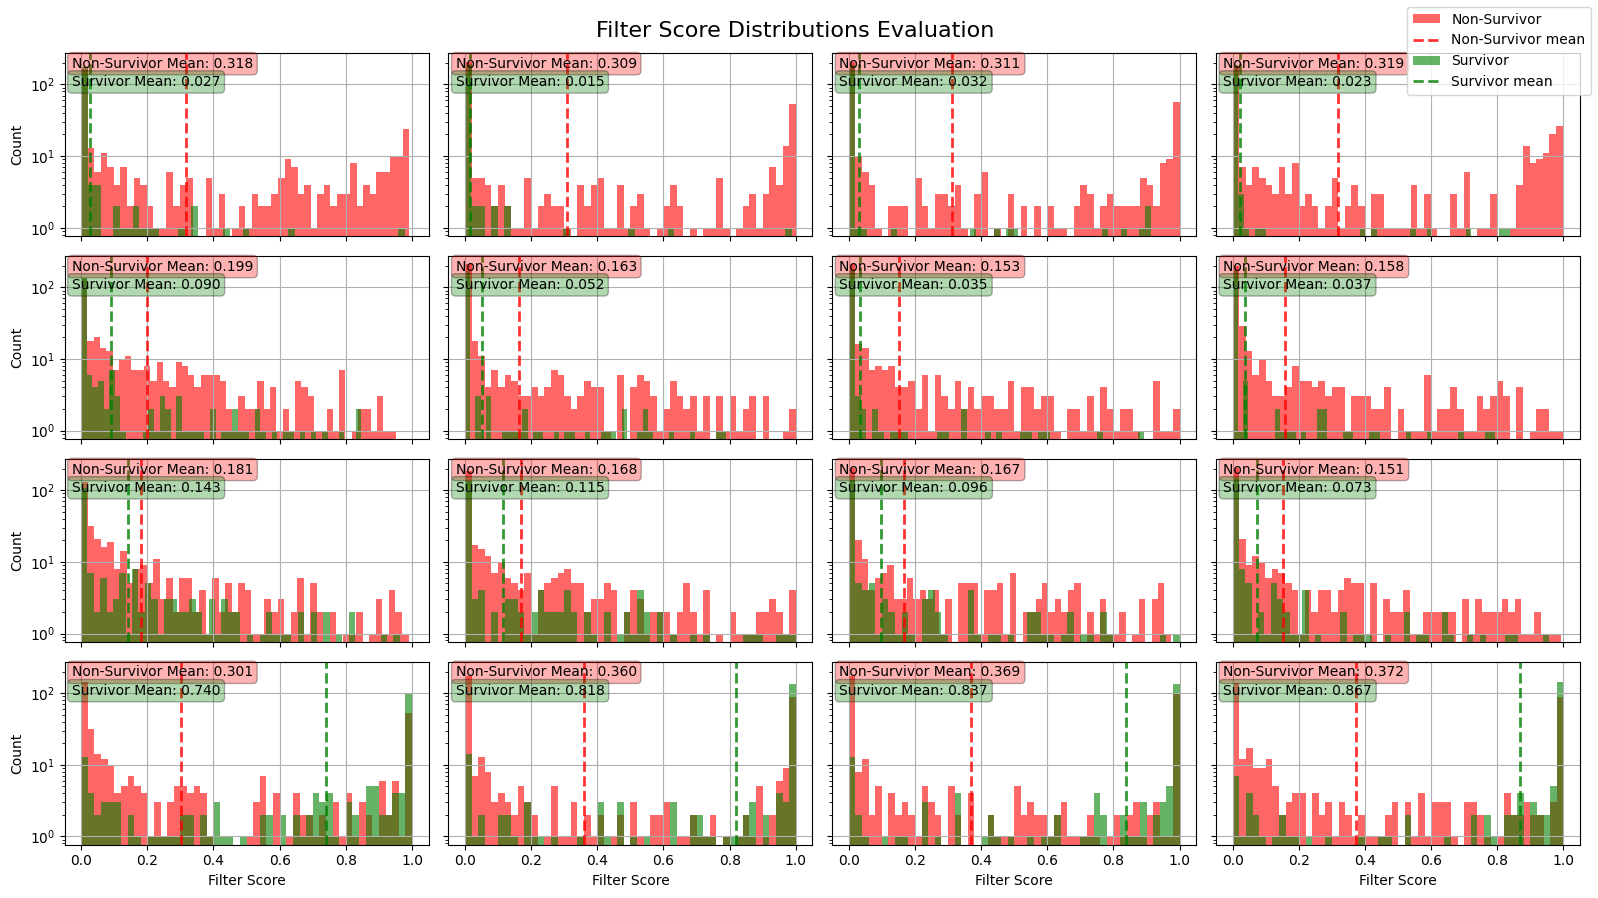

In [3]:

from brainflux.aggregators import FilterAggregator


for data_filter in data_filters:
    aggregated_data = FilterAggregator(data_loader, data_filter).aggregate()
    
    print(f"Evaluating filter: {data_filter}. Aggregated data shape: {aggregated_data.distribution.shape}")
    
    
    for evaluator in evaluators:
        res = evaluator.evaluate(aggregated_data)

